In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('whitegrid')
plt.style.use('seaborn')
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
facebook = pd.read_csv('Facebook.csv')
facebook.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2013-01-02,28.180000,27.420000,27.440001,28.000000,69846400,28.000000
1,2013-01-03,28.469999,27.590000,27.879999,27.770000,63140600,27.770000
2,2013-01-04,28.930000,27.830000,28.010000,28.760000,72715400,28.760000
3,2013-01-07,29.790001,28.650000,28.690001,29.420000,83781800,29.420000
4,2013-01-08,29.600000,28.860001,29.510000,29.059999,45871300,29.059999


In [4]:
facebook.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [5]:
facebook['Date'] = facebook['Date'].astype('datetime64')

In [6]:
facebook.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [7]:
facebook = facebook.set_index('Date')
facebook.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,28.180000,27.420000,27.440001,28.000000,69846400,28.000000
2013-01-03,28.469999,27.590000,27.879999,27.770000,63140600,27.770000
2013-01-04,28.930000,27.830000,28.010000,28.760000,72715400,28.760000
2013-01-07,29.790001,28.650000,28.690001,29.420000,83781800,29.420000
2013-01-08,29.600000,28.860001,29.510000,29.059999,45871300,29.059999


In [8]:
data = facebook[['Close']]
data.head()

,Close
Date,
2013-01-02,28.000000
2013-01-03,27.770000
2013-01-04,28.760000
2013-01-07,29.420000
2013-01-08,29.059999


In [9]:
data.rename(columns={'Close':'Price'}, inplace=True)
data.rename(columns={'Price':'price'}, inplace=True)

In [10]:
data.head()

,price
Date,
2013-01-02,28.000000
2013-01-03,27.770000
2013-01-04,28.760000
2013-01-07,29.420000
2013-01-08,29.059999


In [11]:
data['returns'] = np.log(data['price'].shift(1) / data['price'])

In [12]:
data.tail()

,price,returns
Date,,
2019-12-24,205.119995,0.005154
2019-12-26,207.789993,-0.012933
2019-12-27,208.100006,-0.001491
2019-12-30,204.410004,0.017891
2019-12-31,205.250000,-0.004101


The simple time series momentum strategy is to buy the stock if the last return was positive and sell it if it was negative.

In [13]:
data['position'] = np.sign(data['returns'])
data['strategy'] = data['position'].shift(1)*data['returns']

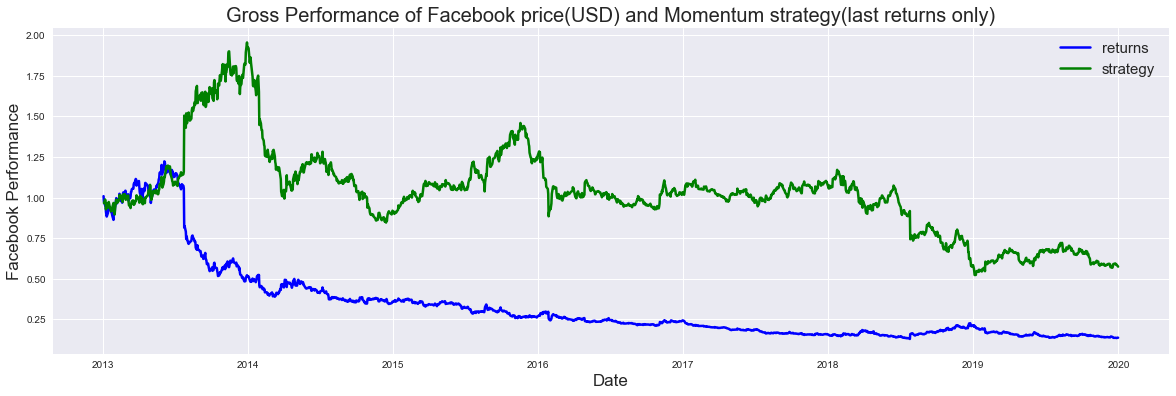

The strategy books a win relative to the base instrument using the last returns only


In [14]:
plt.figure(figsize=(20,6))
plt.title('Gross Performance of Facebook price(USD) and Momentum strategy(last returns only)', fontsize=20)
plt.plot(data['returns'].cumsum().apply(np.exp), label='returns', color='blue', linewidth=2.5)
plt.plot(data['strategy'].cumsum().apply(np.exp), label='strategy', color='green', linewidth=2.5)
plt.xlabel('Date', fontsize=17)
plt.ylabel('Facebook Performance', fontsize=17)
plt.legend(fontsize=15)
plt.show()
print('The strategy books a win relative to the base instrument using the last returns only')

## Rolling time window
Using a rolling time window, the series can be generalized to more than just the last returns. I.e the last three returns can be used to create signals for the positioning.

In [15]:
def plot_momentum(df):
    
    rol = int(input('Enter the rolling window as an integer: '))
    
    df['position'] = np.sign(df['returns'].rolling(rol).mean())
    df['strategy'] = df['position'].shift(1)*df['returns']
    
    plt.figure(figsize=(20,6))
    plt.title(f'Gross Performance of Facebook price(USD) and Momentum strategy (last {rol} returns)', fontsize=20)
    plt.plot(df['returns'].cumsum().apply(np.exp), label='returns', color='blue', linewidth=2.5)
    plt.plot(df['strategy'].cumsum().apply(np.exp), label='strategy', color='green', linewidth=2.5)
    plt.xlabel('Date', fontsize=17)
    plt.ylabel('Facebook Performance', fontsize=17)
    plt.legend(fontsize=15)
    plt.show()

Enter the rolling window an integer: 1


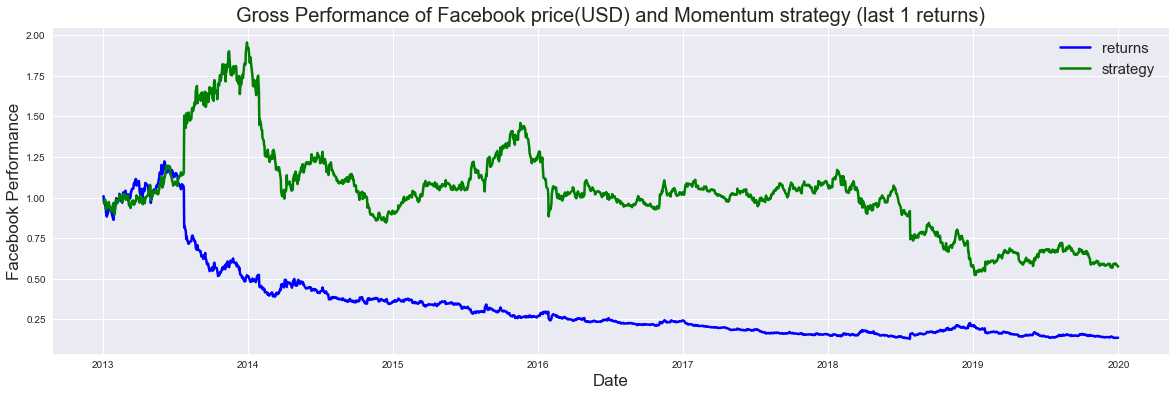

In [16]:
plot_momentum(data)

Enter the rolling window an integer: 2


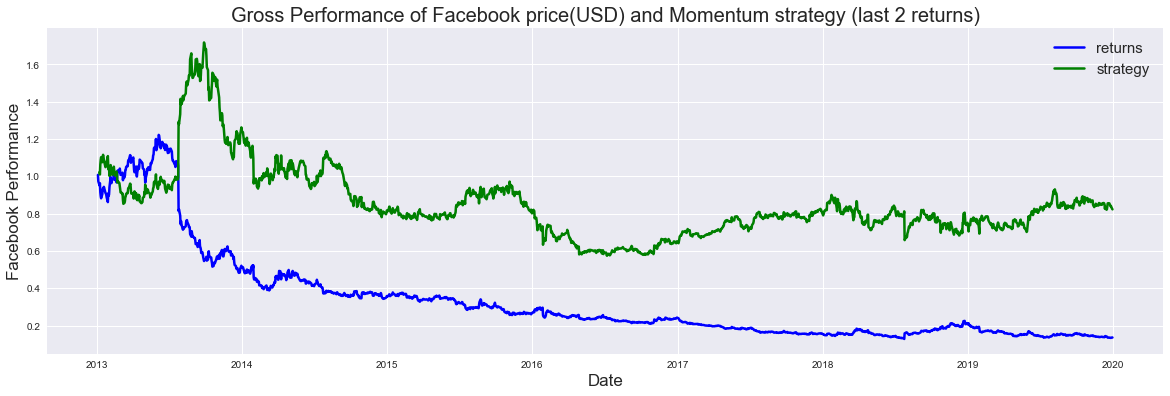

In [17]:
plot_momentum(data)

Enter the rolling window an integer: 3


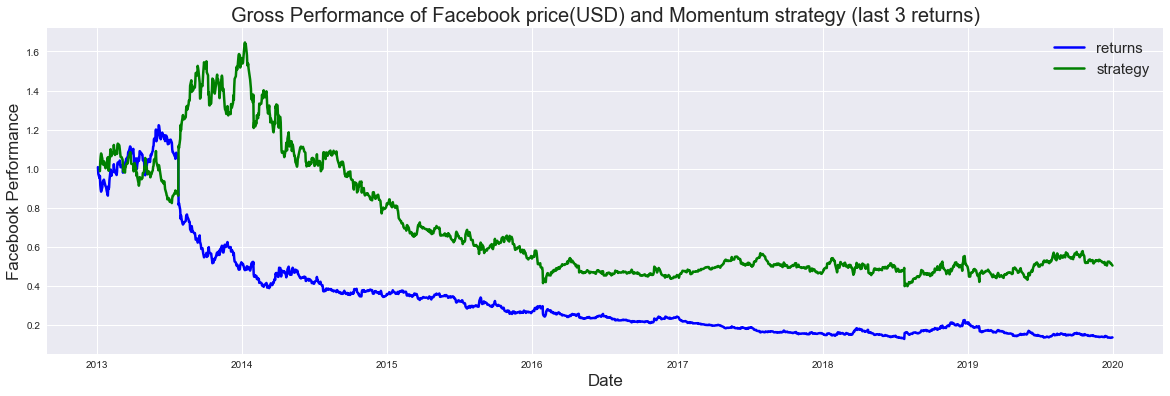

In [18]:
plot_momentum(data)

Enter the rolling window an integer: 4


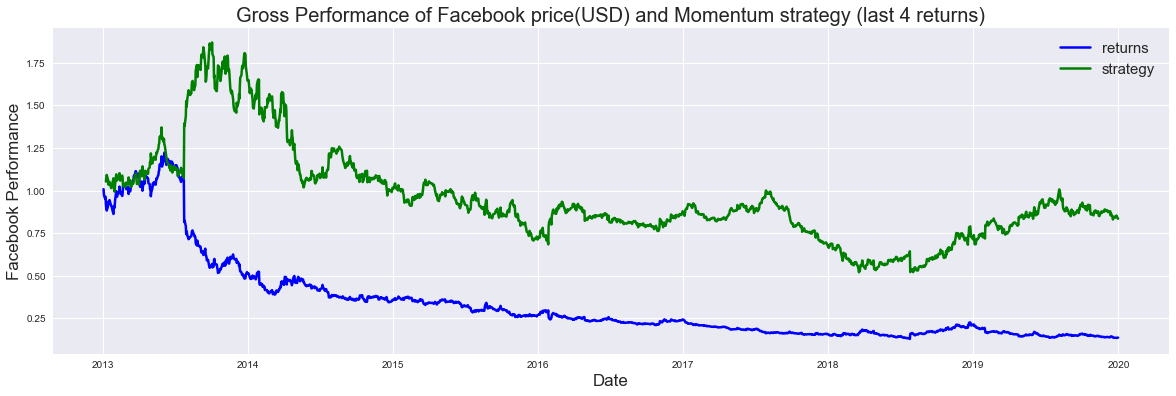

In [19]:
plot_momentum(data)

Enter the rolling window an integer: 5


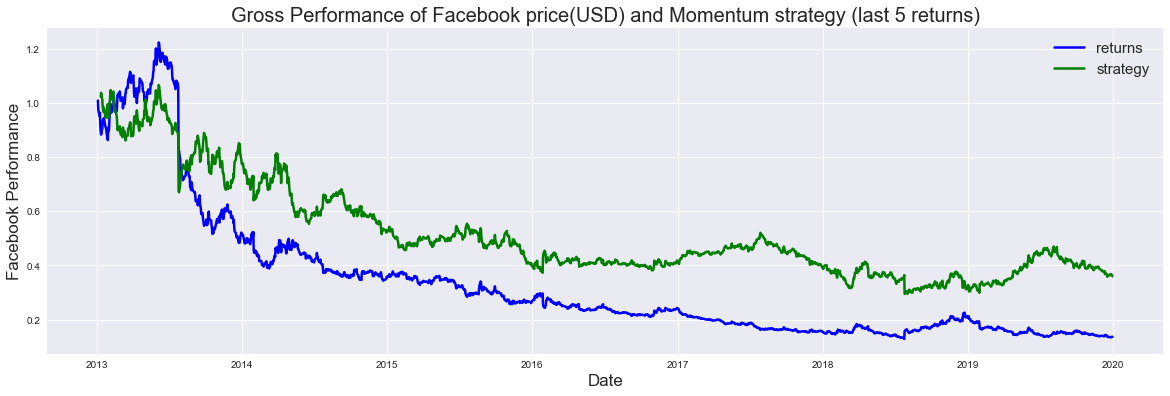

In [20]:
plot_momentum(data)